In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define a function to fetch and concatenate the closing prices of multiple cryptocurrencies
def fetch_and_concat_closing_prices(*crypto_symbols):
    """
    Fetch and concatenate the closing prices of multiple cryptocurrencies.
    
    Args:
        *crypto_symbols (str): Variable number of cryptocurrency symbols.
        
    Returns:
        pd.DataFrame: A DataFrame containing the concatenated closing prices.
    """
    # Initialize an empty DataFrame to store the closing prices
    all_closing_prices = pd.DataFrame()
    
    # Fetch data for each cryptocurrency symbol
    for symbol in crypto_symbols:
        # Fetch historical price data for the cryptocurrency
        crypto_data = yf.download(symbol, interval="1d", auto_adjust=True)
        
        # Extract the closing prices and rename the column
        closing_prices = crypto_data['Close'].rename(symbol)
        
        # Concatenate the closing prices to the DataFrame
        all_closing_prices = pd.concat([all_closing_prices, closing_prices], axis=1)
    
    return all_closing_prices

In [3]:
# Define a list of cryptocurrency symbols you want to track
crypto_symbols = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'ADA-USD','BNB-USD', 'DOT-USD', 'LINK-USD', 'XLM-USD', 'SOL-USD', 'DOGE-USD', 'ETC-USD']

In [4]:
# Fetch and concatenate the closing prices of the selected cryptocurrencies
crypto_closing_prices = fetch_and_concat_closing_prices(*crypto_symbols)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Calculate the daily returns for each cryptocurrency
crypto_returns = crypto_closing_prices.pct_change().dropna()

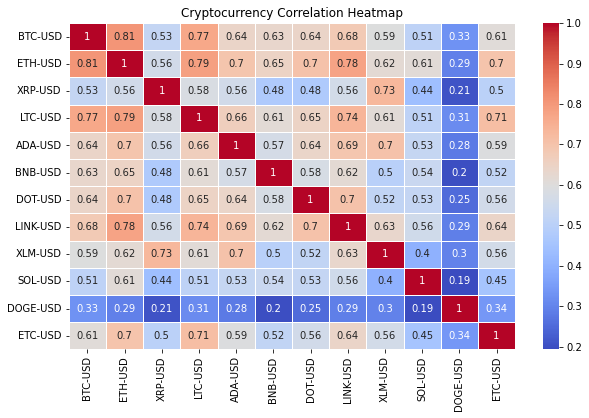

In [6]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crypto_returns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Cryptocurrency Correlation Heatmap')
plt.show()